# LINEARREGRESSION

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
del data['Date']
del data['Adj Close']

In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
data.shape

(2956, 5)

In [6]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
df=data.dropna()

In [8]:
df.head()

,Open,High,Low,Close,Volume
0,3.800,5.000,3.508,4.778,93831500
1,5.158,6.084,4.660,4.766,85935500
2,5.000,5.184,4.054,4.392,41094000
3,4.600,4.620,3.742,3.840,25699000
4,4.000,4.000,3.166,3.222,34334500


In [9]:
x=df.drop(labels=['Close'],axis=1)
y=df.loc[:,'Close']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
print("NUMBER OF TRAIN DATASET:",len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET: 2364
NUMBER OF TEST DATASET      :  592
TOTAL NUMBER OF DATASET    :  2956


In [11]:
x_train

,Open,High,Low,Volume
2109,69.674004,69.956001,66.068001,34707500
2106,68.667999,70.236000,68.160004,36872500
236,6.020000,6.026000,5.652000,11655500
1700,55.608002,56.400002,55.442001,20742000
845,36.000000,36.285999,34.271999,112335500
...,...,...,...,...
2121,69.400002,69.500000,67.910004,15403500
1424,35.730000,37.703999,35.040001,28753500
1725,59.599998,61.709999,59.360001,40886500
2254,42.076000,42.980000,41.501999,40841500


In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [14]:
predicted = LR.predict(x_test)

In [15]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF LINEAR REGRESSION IS :",R2)

THE R2 SCORE OF LINEAR REGRESSION IS : 0.9996265624626381


In [16]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF  LINEAR REGRESSION IS :",RAND*100)

THE ACCURACY SCORE OF  LINEAR REGRESSION IS : 99.99371198609778


In [17]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF  LINEAR REGRESSION IS :",EVS)

THE EXPLAINED VARIENCE SCORE OF  LINEAR REGRESSION IS : 0.999629167986741


In [18]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF  LINEAR REGRESSION IS :",MSE)

THE MEAN SQUARED ERROR SCORE OF  LINEAR REGRESSION IS : 28.874446182934502


In [19]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF  LINEAR REGRESSION IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF  LINEAR REGRESSION IS : 0.2452317001102422


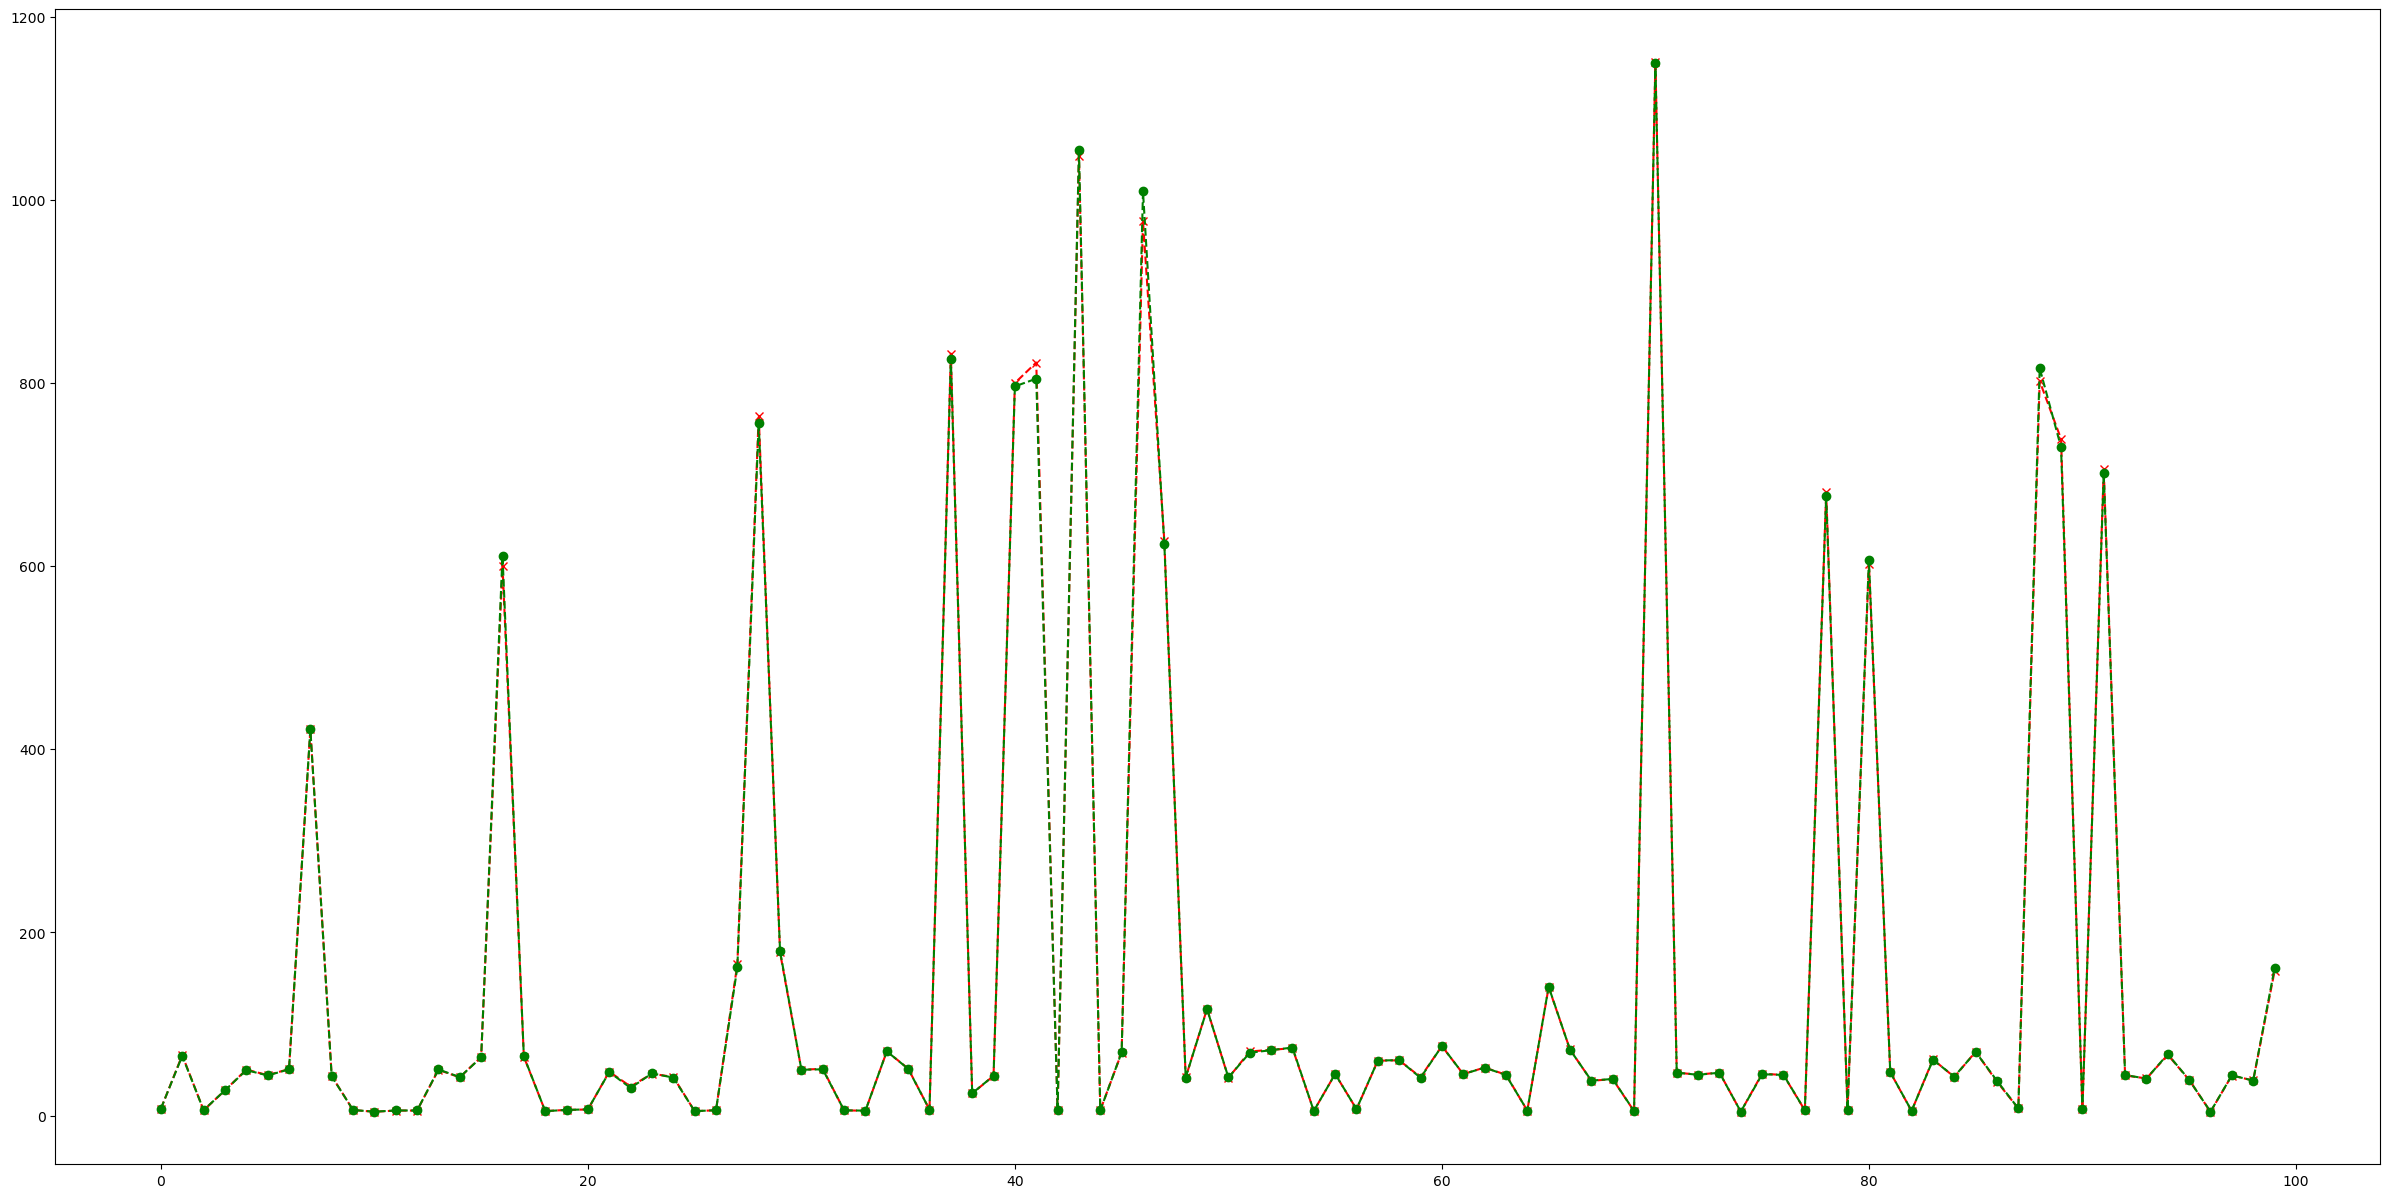

In [20]:
import matplotlib.pyplot as plt
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(30,15))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [21]:
import joblib
joblib.dump(LR, 'Tesla.pkl')

['Tesla.pkl']